In [3]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

from pylab import rcParams
rcParams['figure.figsize'] = 12,6
RANDOM_SEED = 42
LABELS = ["Positive", "Negative"]

In [13]:

  data = pd.read_csv('/content/creditcard_for_fraud_detection.csv',on_bad_lines='skip',sep=',')
  data.head()





<ipython-input-13-e598ba045c22>:1: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/creditcard_for_fraud_detection.csv',on_bad_lines='skip',sep=',')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [16]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280801,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
280802,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
280803,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
280804,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0


In [14]:
data.info

<bound method DataFrame.info of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
280801  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
280802  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
280803  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
280804  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
280805  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599  0.098698  0.363787  ... -0.018307  0.277838   
1      -0.082361 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672   
2       1.800499  0.791461  0.247676 -1.514654  ...  0.247998  0.771679   
3       1.247203  0.237609  0.377436 -1.387024  ... -0.108300  0.005274   
4       0.095921  0.592941 -0.270533  0.817739  ... -0.009431  0.798278   
...          ...       ...       ...       ...  ...       ...       ...   
280801 -2.606837 -4.918215  7.305334  1.914428  ...  0.213454  0.111864   
280802  1.058415  0.024330  0.294869  0.584800  ...  0.214205  0.924384   
280803  3.031260 -0.296827  0.708417  0.432454  ...  0.232045  0.578229   
280804  0.623708 -0.686180  0.679145  0.392087  ...  0.265245  0.800049   
280805 -0.649617  1.577006 -0.414650  0.486180  ...  0.261057  0.643078   

             V23       V24       V25       V26       V27       V28  Amount  \
0      -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053  149.62   
1       0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724    2.69   
2       0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752  378.66   
3      -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458  123.50   
4      -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   69.99   
...          ...       ...       ...       ...       ...       ...     ...   
280801  1.014480 -0.509348  1.436807  0.250034  0.943651  0.823731    0.77   
280802  0.012463 -1.016226 -0.606624 -0.395255  0.068472 -0.053527   24.79   
280803 -0.037501  0.640134  0.265745 -0.087371  0.004455 -0.026561   67.88   
280804 -0.163298  0.123205 -0.569159  0.546668  0.108821  0.104533   10.00   
280805  0.376777  0.008797 -0.473649 -0.818267 -0.002415  0.013649  217.00   

        Class  
0         0.0  
1         0.0  
2         0.0  
3         0.0  
4         0.0  
...       ...  
280801    0.0  
280802    0.0  
280803    0.0  
280804    0.0  
280805    0.0  

[280806 rows x 31 columns]>

In [15]:
data.isnull().values.any()

True

In [17]:
#data cleaning for null values
data.isnull().sum()


,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [18]:
#drop that null values raw
data.dropna(inplace=True)

In [19]:
data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [20]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280801,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.0
280802,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.0
280803,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.0
280804,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.0


<ipython-input-21-5480d8ee9915>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(data['Class'], sort = True)


Text(0, 0.5, 'Frequency')

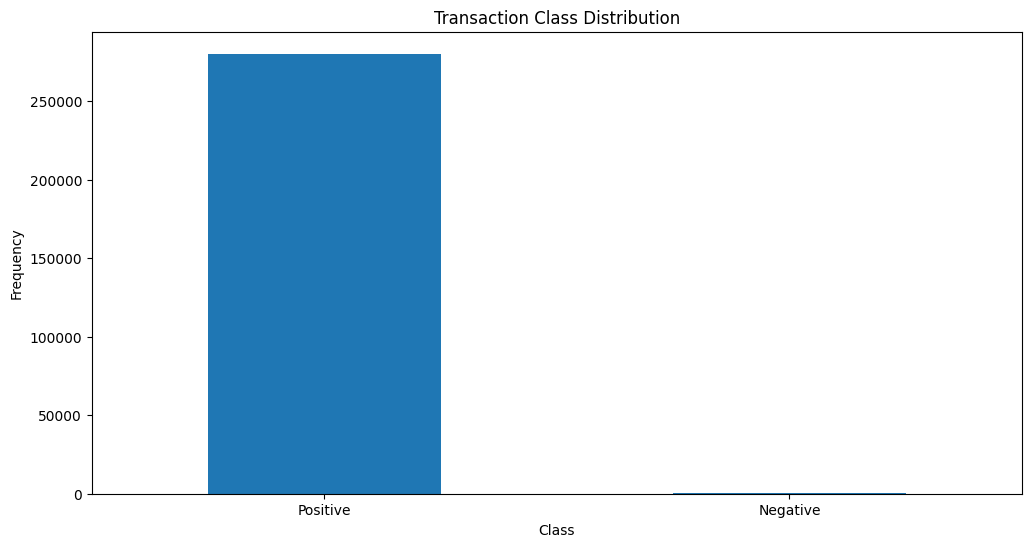

In [21]:
count_classes = pd.value_counts(data['Class'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Transaction Class Distribution")

plt.xticks(range(2), LABELS)

plt.xlabel("Class")

plt.ylabel("Frequency")

In [24]:


fraud = data[data['Class']==1]
print(fraud.shape)
normal = data[data['Class']==0]
print(normal.shape)

(469, 31)
(280335, 31)


In [29]:
fraud.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,...,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.000000,469.0000,469.0
mean,84316.260128,-4.955870,3.642690,-7.125704,4.533494,-3.270069,-1.367515,-5.729142,0.566906,-2.629859,...,0.730115,0.029756,-0.034133,-0.100453,0.040576,0.040551,0.156485,0.066484,123.6658,1.0
std,46124.892618,6.885181,4.384428,7.261521,2.921986,5.455593,1.871911,7.325906,6.960055,2.533717,...,3.961412,1.527230,1.611469,0.518920,0.767025,0.474748,1.403118,0.553623,249.7433,0.0
min,406.000000,-30.552380,-8.402154,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.434066,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.0000,1.0
25%,41991.000000,-6.423306,1.145381,-9.136521,2.286869,-4.801176,-2.440115,-8.643193,-0.203329,-3.908206,...,0.019649,-0.521934,-0.330358,-0.440454,-0.310933,-0.263189,-0.026667,-0.127944,1.0000,1.0
50%,77182.000000,-2.434004,2.693867,-5.066283,4.127549,-1.549878,-1.341764,-3.028013,0.625278,-2.274630,...,0.609508,0.083353,-0.072173,-0.059045,0.084735,-0.009466,0.385107,0.135698,12.3100,1.0
75%,129222.000000,-0.469327,5.151094,-2.171454,6.349248,0.186939,-0.371634,-0.932429,1.869838,-0.836098,...,1.325218,0.656076,0.308536,0.298242,0.448552,0.386801,0.851798,0.373834,106.9000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.361985,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.8700,1.0


In [28]:
normal.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,...,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.000000,280335.0
mean,96087.377416,0.012098,-0.010138,-0.001788,-0.013551,0.005775,-0.001433,0.012419,0.000038,-0.013447,...,0.000457,0.003493,0.000227,-0.000155,-0.001245,-0.000825,-0.000089,-0.000107,88.612595,0.0
std,46638.914113,1.933488,1.639391,1.459246,1.398376,1.360064,1.329339,1.181148,1.158011,1.079592,...,0.710977,0.723864,0.622281,0.605842,0.521652,0.481501,0.399177,0.330035,251.020117,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.0
25%,55484.000000,-0.915627,-0.603679,-0.897571,-0.853923,-0.689771,-0.769777,-0.549582,-0.208815,-0.650302,...,-0.226384,-0.540539,-0.161861,-0.354553,-0.318680,-0.326468,-0.070724,-0.053151,5.570000,0.0
50%,86116.000000,0.023865,0.061234,0.168349,-0.027911,-0.052420,-0.276165,0.044007,0.022356,-0.062097,...,-0.027062,0.011368,-0.010959,0.040832,0.013939,-0.052731,0.001499,0.011081,22.000000,0.0
75%,139753.500000,1.322173,0.797970,1.016035,0.728776,0.614679,0.395718,0.574215,0.326511,0.575821,...,0.187829,0.533818,0.148355,0.440658,0.350226,0.239195,0.090617,0.078087,77.700000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.463246,31.612198,33.847808,25691.160000,0.0


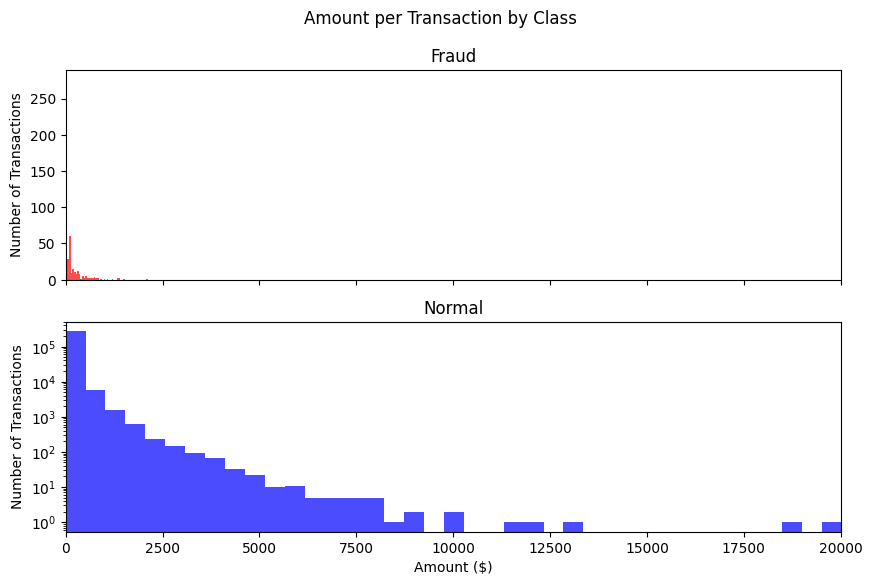

In [33]:

import matplotlib.pyplot as plt

# Create subplots with shared x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))
fig.suptitle('Amount per Transaction by Class')

# Define the number of bins
bins = 50

# Plot histogram for fraud transactions
ax1.hist(fraud.Amount, bins=bins, color='red', alpha=0.7)
ax1.set_title('Fraud')
ax1.set_ylabel('Number of Transactions')

# Plot histogram for normal transactions
ax2.hist(normal.Amount, bins=bins, color='blue', alpha=0.7)
ax2.set_title('Normal')
ax2.set_xlabel('Amount ($)')
ax2.set_ylabel('Number of Transactions')

# Set x-axis limits and y-axis scale
plt.xlim(0, 20000)
plt.yscale('log')

# Display the plot
plt.show()


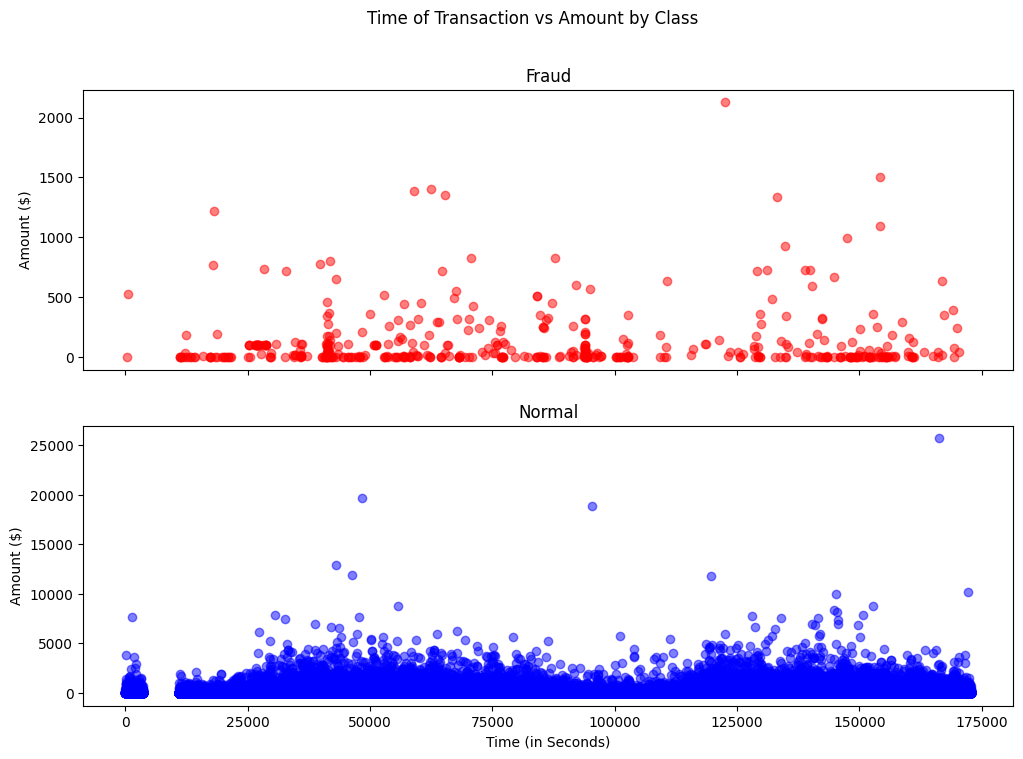

In [34]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 8))
fig.suptitle('Time of Transaction vs Amount by Class')

ax1.scatter(fraud.Time, fraud.Amount, color='red', alpha=0.5)
ax1.set_title('Fraud')
ax1.set_ylabel('Amount ($)')

ax2.scatter(normal.Time, normal.Amount, color='blue', alpha=0.5)
ax2.set_title('Normal')
ax2.set_xlabel('Time (in Seconds)')
ax2.set_ylabel('Amount ($)')

# Display the plot
plt.show()


In [35]:
data_s= data.sample(frac = 0.1,random_state=1)
data_s.shape

(28080, 31)

In [36]:
fraud_s = data_s[data_s['Class']==1]

normal_s = data_s[data_s['Class']==0]



In [38]:
Outlier_f= len(fraud_s)/float(len(normal_s))
print(Outlier_f)
print("Number of Outliers:",len(fraud_s))
print("Number of Inliers:",len(normal_s))

0.0014622490103070724
Number of Outliers: 41
Number of Inliers: 28039


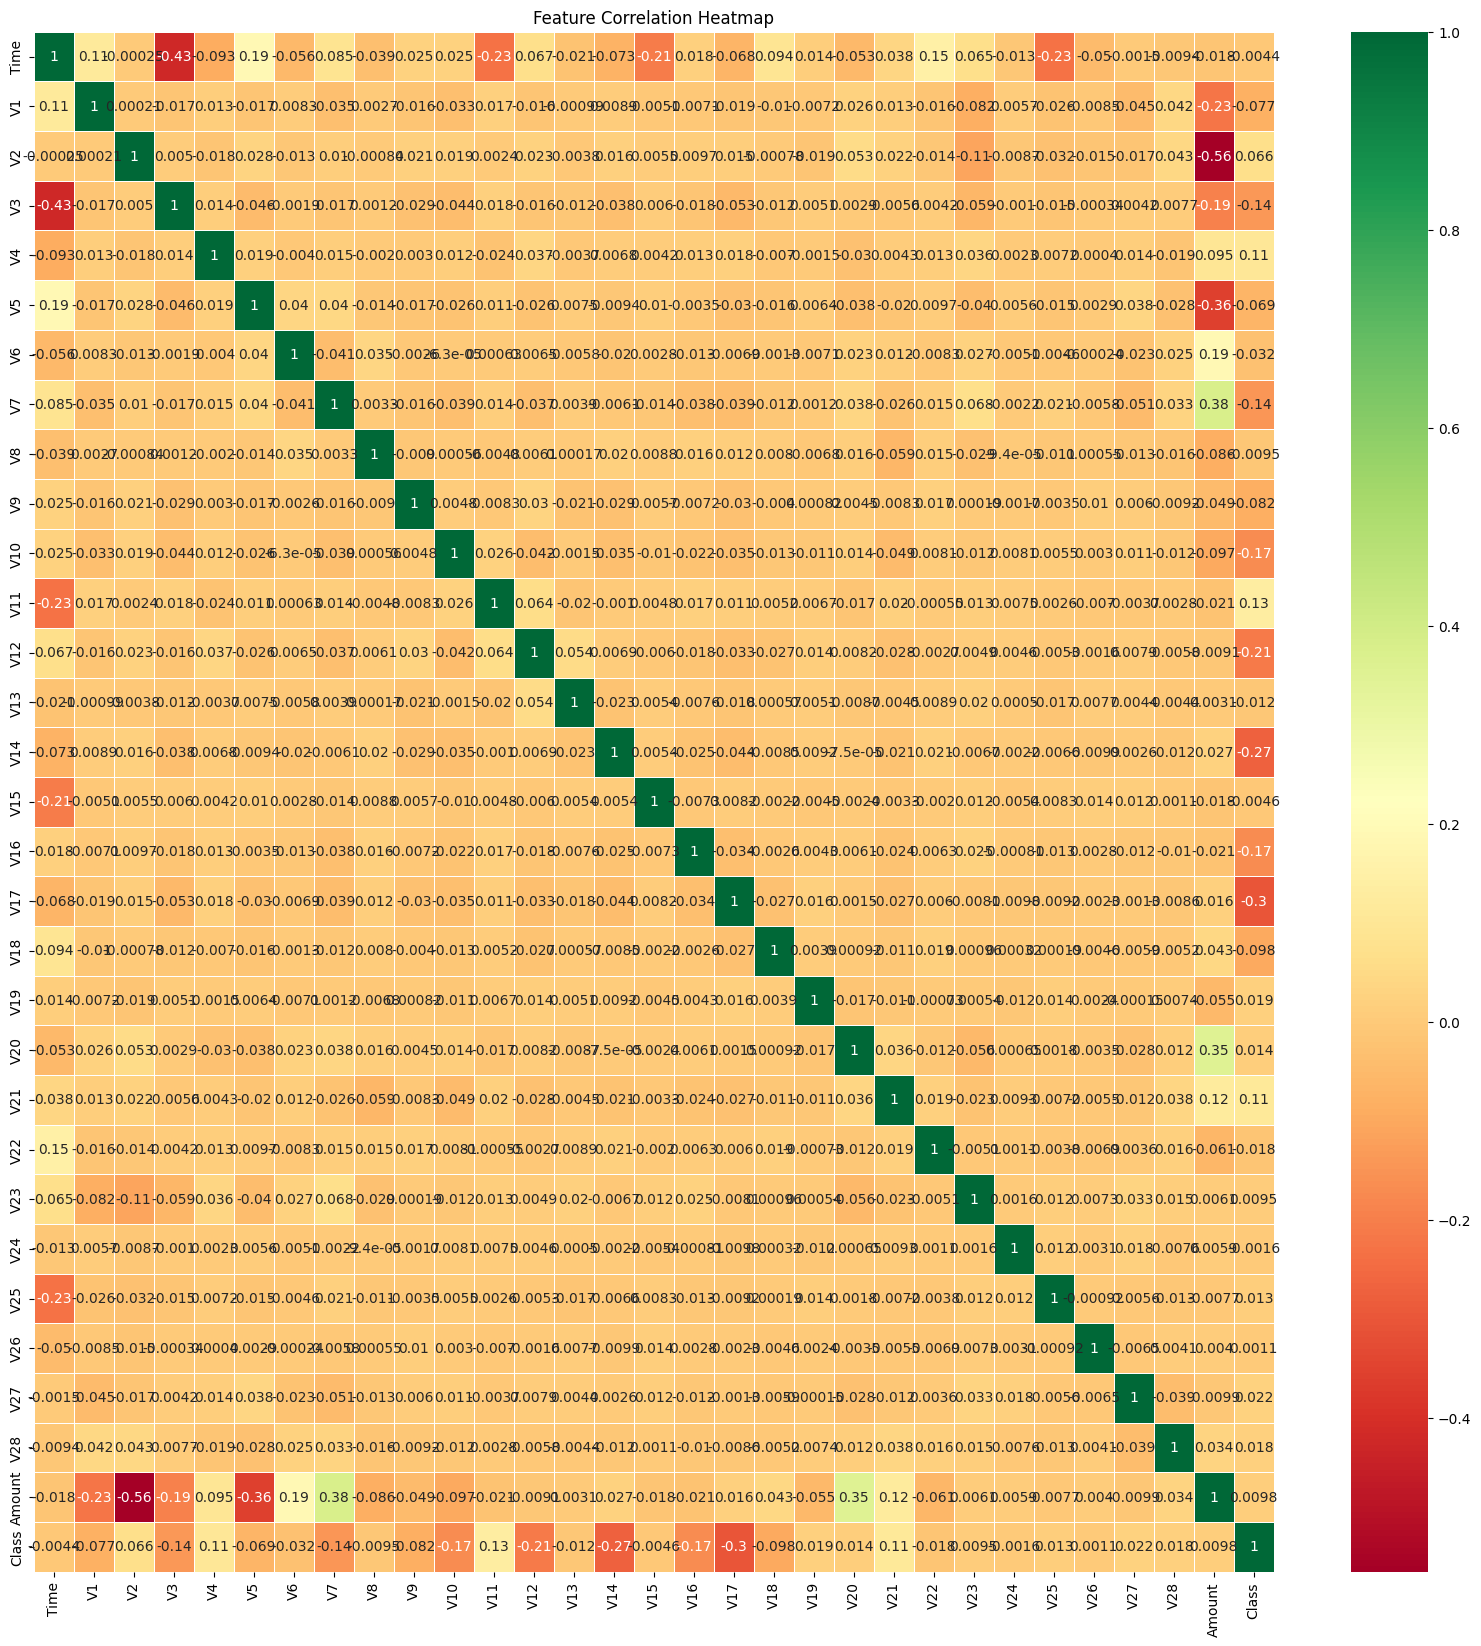

In [41]:

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = data_s.corr()
sorted_features = correlation_matrix.columns

plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(data_s[sorted_features].corr(), annot=True, cmap="RdYlGn", linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


In [44]:
import numpy as np

features = data_s.columns.difference(["Class"])
target = "Class"
state = np.random.RandomState(42)

X = data_s[features]
Y = data_s[target]
X_outliers = state.uniform(low=0, high=1, size=X.shape)

print(X.shape)
print(Y.shape)


(28080, 30)
(28080,)


In [46]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score
model = IsolationForest(n_estimators=100, max_samples=len(X),
                                       contamination=Outlier_f,random_state=state, verbose=0)

In [47]:
model.fit(X)

IsolationForest(contamination=0.0014622490103070724, max_samples=28080,
                random_state=RandomState(MT19937) at 0x7FA3C4866440)

In [49]:

data_s['anomaly'] = model.predict(X)


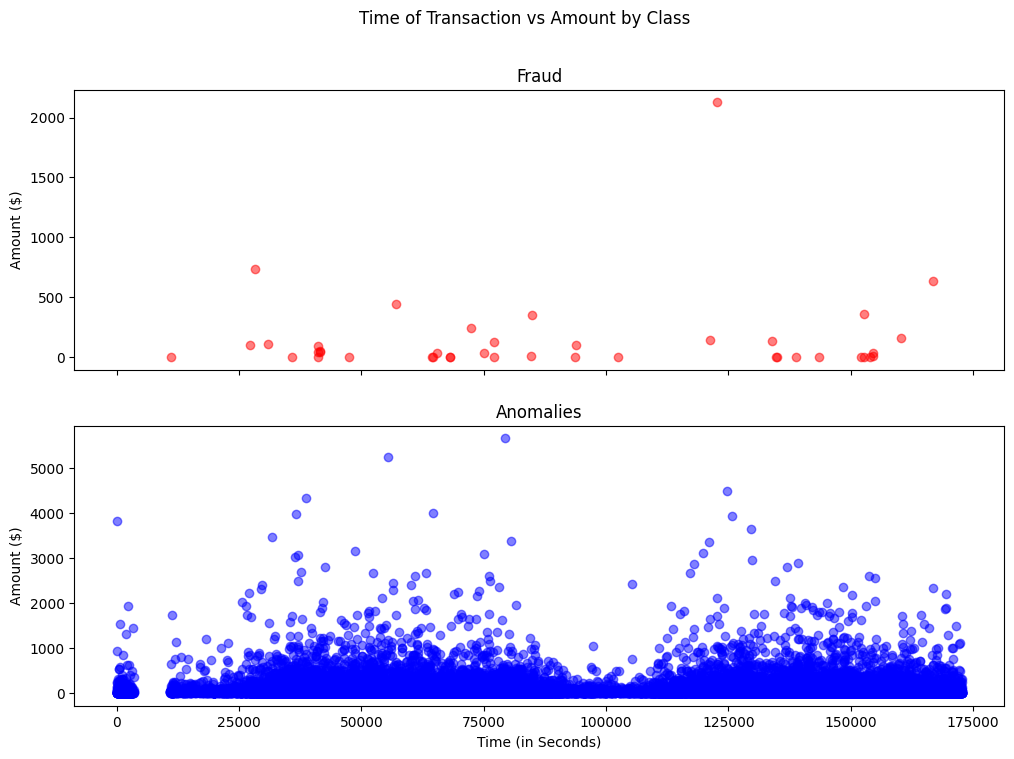

In [50]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.suptitle('Time of Transaction vs Amount by Class')
fraud = data_s[data_s['Class'] == 1]
ax1.scatter(fraud['Time'], fraud['Amount'], color='red', alpha=0.5)
ax1.set_title('Fraud')
ax1.set_ylabel('Amount ($)')
anomalies = data_s[data_s['anomaly'] == 1]
ax2.scatter(anomalies['Time'], anomalies['Amount'], color='blue', alpha=0.5)
ax2.set_title('Anomalies')
ax2.set_xlabel('Time (in Seconds)')
ax2.set_ylabel('Amount ($)')

plt.show()


In [53]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report

clf = IsolationForest(n_estimators=100, contamination=0.001, random_state=42)
clf.fit(X)
y_pred = clf.predict(X)

y_pred = [0 if x == 1 else 1 for x in y_pred]
n_errors = (y_pred != Y).sum()

print("Isolation Forest")
print("Number of errors: {}".format(n_errors))
print("Accuracy Score:")
print(accuracy_score(Y, y_pred))
print("Classification Report:")
print(classification_report(Y, y_pred))


Isolation Forest
Number of errors: 48
Accuracy Score:
0.9982905982905983
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28039
         1.0       0.38      0.27      0.31        41

    accuracy                           1.00     28080
   macro avg       0.69      0.63      0.66     28080
weighted avg       1.00      1.00      1.00     28080



In [54]:
#Q2
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Credit Card Customer Data.csv')

In [55]:
# check for missings values
df.isnull().sum()

,0
Sl_No,0
Customer Key,0
Avg_Credit_Limit,0
Total_Credit_Cards,0
Total_visits_bank,0
Total_visits_online,0
Total_calls_made,0


In [56]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [63]:
data_for_clustering = df[['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']]


In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

In [68]:
scaled_df = pd.DataFrame(scaled_data, columns=data_for_clustering.columns)


In [69]:
scaled_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
...,...,...,...,...,...
655,1.713589,2.443892,-0.860451,2.520519,-1.251537
656,1.314621,2.443892,-0.860451,3.543188,-0.553005
657,2.937092,1.520613,-0.860451,2.179629,-0.902271
658,3.655235,2.443892,-0.860451,4.224968,-1.251537


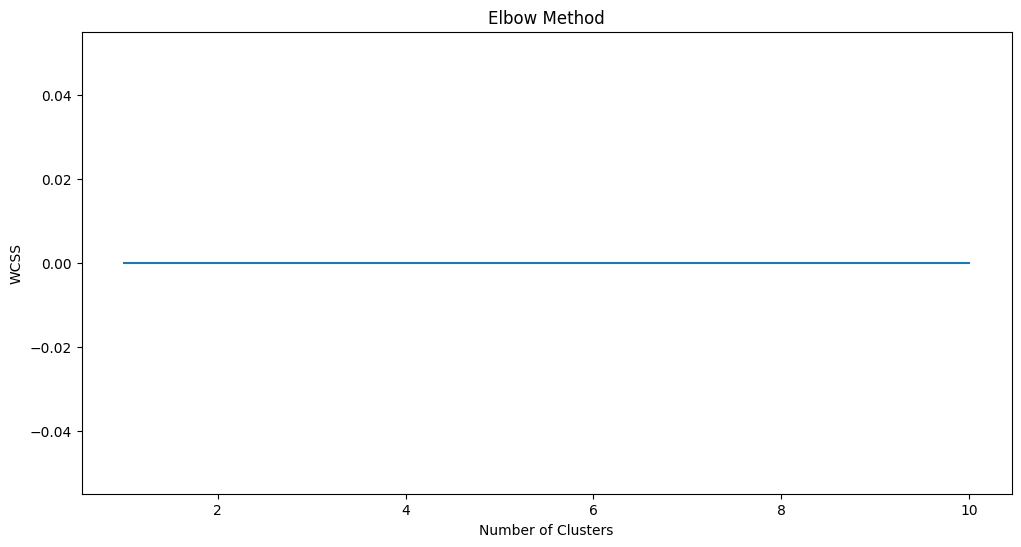

In [70]:
#K-Means Clustering
import numpy as np
import matplotlib.pyplot as plt

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        clusters.append(np.argmin(distances))
    return clusters

def update_centroids(data, clusters, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        points = [data[j] for j in range(len(data)) if clusters[j] == i]
        if points:
            new_centroids[i] = np.mean(points, axis=0)
    return new_centroids

def k_means(data, k, max_iters=100):
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    for _ in range(max_iters):
        clusters = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

def calculate_wcss(data, k):
    clusters, centroids = k_means(data, k)
    wcss = 0
    for i in range(k):
        wcss += np.sum([euclidean_distance(point, centroids[i]) ** 2 for point in data[clusters == i]])
    return wcss

wcss = []
for k in range(1, 11):
    wcss.append(calculate_wcss(scaled_data, k))

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


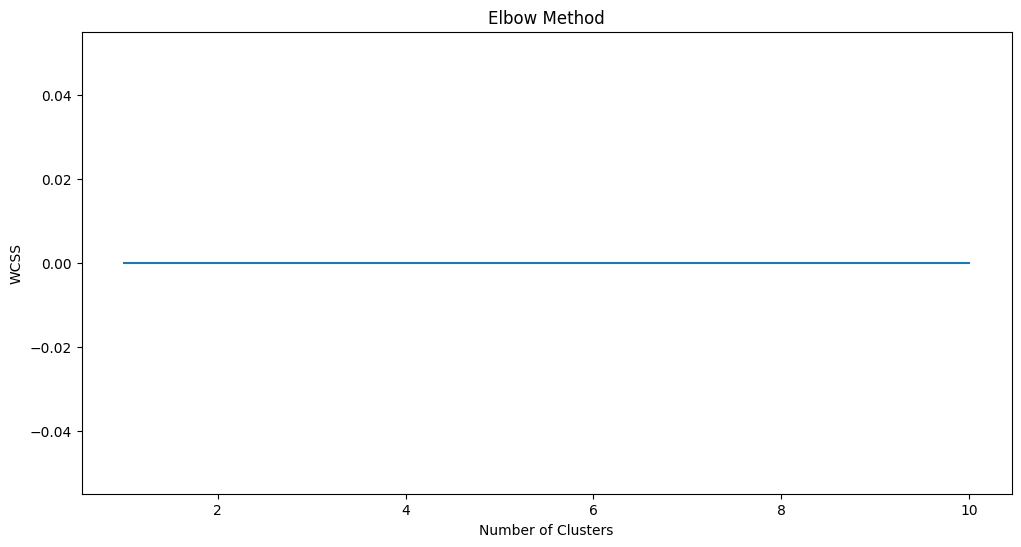

In [67]:
import matplotlib.pyplot as plt

def calculate_wcss(data, k):
    clusters, centroids = k_means(data, k)
    wcss = 0
    for i in range(k):
        wcss += np.sum([euclidean_distance(point, centroids[i]) ** 2 for point in data[clusters == i]])
    return wcss

wcss = []
for k in range(1, 11):
    wcss.append(calculate_wcss(scaled_data, k))

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


[0.41842496663215445, 0.5157182558881063, 0.3556670619372605, 0.27448096842627917, 0.23326164994933532, 0.24900963979094864, 0.24062180730956773, 0.2360273874493727, 0.2165734994857407]


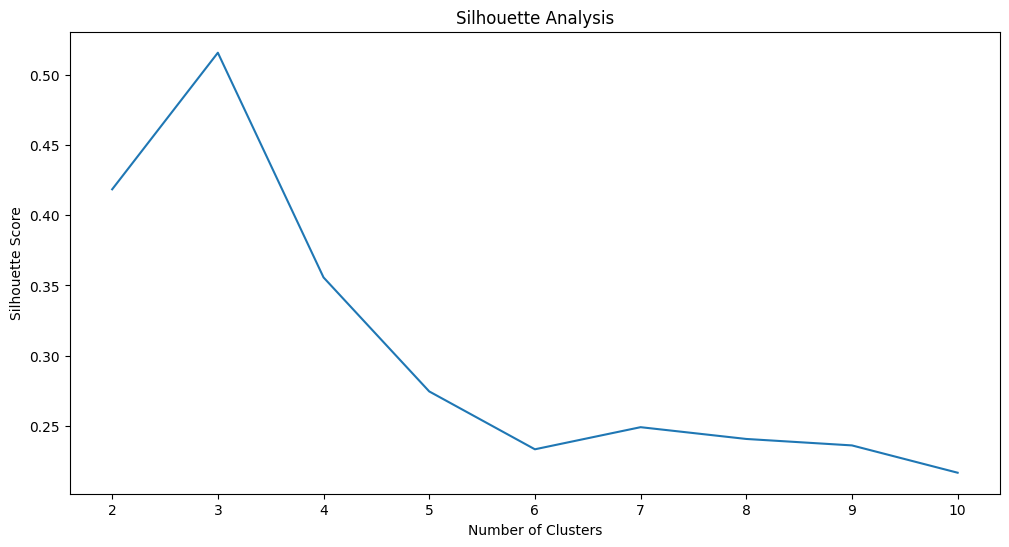

In [78]:
from sklearn.metrics import silhouette_score

def silhouette_analysis(data, k):
    clusters, _ = k_means(data, k)
    return silhouette_score(data, clusters)

silhouette_scores = [silhouette_analysis(scaled_data, k) for k in range(2, 11)]
print(silhouette_scores)
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [ ]:
# score is highest for k=3. That's why cluster should be of 3

In [72]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.m, self.n = X.shape
        self.theta = np.zeros(self.n)
        self.intercept = 0
        for _ in range(self.n_iterations):
            y_pred = self.predict(X)
            residuals = y_pred - y
            gradient_theta = (2 / self.m) * np.dot(X.T, residuals)
            gradient_intercept = (2 / self.m) * np.sum(residuals)
            self.theta -= self.learning_rate * gradient_theta
            self.intercept -= self.learning_rate * gradient_intercept

    def predict(self, X):
        return np.dot(X, self.theta) + self.intercept


In [75]:
from sklearn.model_selection import train_test_split

features = scaled_df.drop('Avg_Credit_Limit', axis=1)
target = scaled_df['Avg_Credit_Limit']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [76]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.38112237658576786
R^2 Score: 0.5930241859076226


In [77]:
feature_importance = np.abs(model.theta)
important_features = pd.Series(feature_importance, index=features.columns).sort_values(ascending=False)
print(important_features)


Total_visits_online    0.478844
Total_Credit_Cards     0.416386
Total_calls_made       0.261875
Total_visits_bank      0.103765
dtype: float64
